# Import Package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import countplot
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

# Read CSV

In [4]:
headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = pd.read_csv('dataset.txt', names=headers)

            Change Label to Categorical

In [5]:
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes

# Model Selection

In [6]:
feature_col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
predict_col = ['label']
x = df[feature_col]
y = df[predict_col]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

# GaussianNB / Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 95.56%


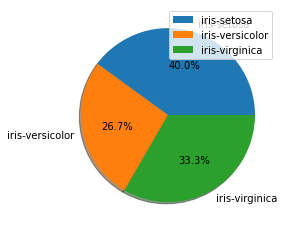

In [10]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.values.ravel())
nb_pred = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, nb_pred)
print(classification_report(y_test, nb_pred, labels=np.unique(nb_pred)))
print('Accuracy: {0:2.2f}%'.format(accuracy*100))

title = ['iris-setosa', 'iris-versicolor', 'iris-virginica']

unique, counts = np.unique(nb_pred, return_counts=True)
plt.pie(counts, labels = title,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show() 

# Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

97.78%


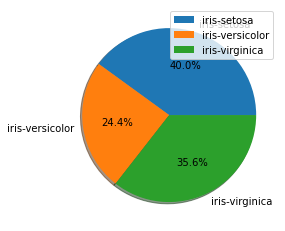

In [14]:
svm_model = svm.SVC(kernel='poly', probability=True)
svm_model.fit(x_train, y_train.values.ravel())
svm_predict = svm_model.predict(x_test)
print(classification_report(y_test, svm_predict, labels=np.unique(svm_predict)))
accuracy = accuracy_score(y_test, svm_predict, normalize=True)
print('{0:2.2f}%'.format(accuracy*100))
title = ['iris-setosa', 'iris-versicolor', 'iris-virginica']

unique, counts = np.unique(svm_predict, return_counts=True)
plt.pie(counts, labels = title,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show() 

# KMeans

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.82      0.93      0.87        40
           2       0.89      0.76      0.82        33

    accuracy                           0.90       105
   macro avg       0.91      0.89      0.90       105
weighted avg       0.90      0.90      0.89       105

89.52%


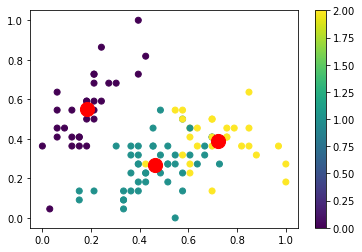

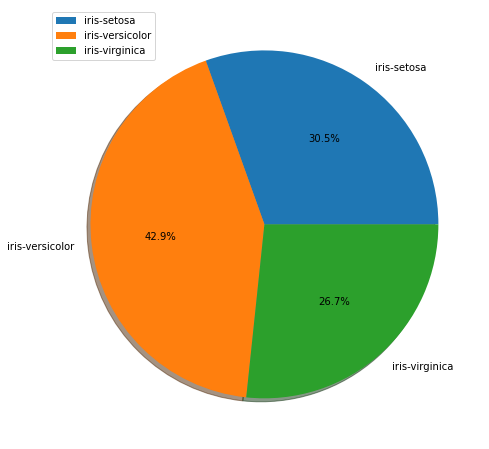

In [21]:

x_arr = np.array(x_train)
sc = MinMaxScaler()
X_scaled = sc.fit_transform(x_arr)
kmeans = KMeans(n_clusters=3, random_state=216,)
kmeans_pred = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_
test_pred = kmeans.predict(x_train)
acc = accuracy_score(y_train.round(), kmeans_pred.round(), normalize=True)
print(classification_report(y_train, kmeans_pred.round()))
print('Accuracy: {0:2.2f}%'.format(acc*100))
title = ['iris-setosa', 'iris-versicolor', 'iris-virginica']
output = plt.scatter(X_scaled[:,0], X_scaled[:,1], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:,0],centroids[:,1],c='red', s=200, alpha=1)
plt.colorbar(output)

unique, counts = np.unique(kmeans_pred, return_counts=True)
plt.figure(figsize=(8,8))
plt.pie(counts, labels = title,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


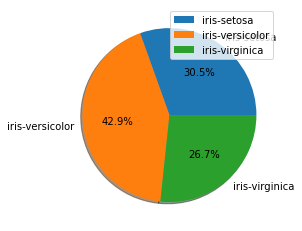

In [26]:
rf_model = RandomForestClassifier(n_estimators=20, criterion='gini', random_state=215, min_samples_split=31)
rf_model.fit(x_train, y_train.values.ravel())
rf_predict = rf_model.predict(x_test)
print(classification_report(y_test, rf_predict, labels=np.unique(rf_predict)))
accuracy = accuracy_score(y_test, rf_predict)
print('Accuracy: {0:2.2f}%'.format(accuracy*100))
unique, counts = np.unique(kmeans_pred, return_counts=True)
plt.pie(counts, labels = title,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

# XGBoost

In [31]:
xg_model = XGBClassifier(n_estimators=2, learning_rate=1, gamma=1)
xg_model.fit(x_train, y_train.values.ravel())
xg_predict = xg_model.predict(x_test)
accuracy = accuracy_score(y_test, xg_predict)
print(classification_report(y_test, xg_predict, labels=np.unique(xg_predict)))
print('Accuracy: {0:2.2f}%'.format(accuracy*100))

[21:43:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%
